<a href="https://colab.research.google.com/github/hemanthmeruga/IEApp/blob/master/CV_Project2_Dog_Breed_Classification_Questions_HM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import vis

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [3]:

from google.colab import drive
drive.mount('/gdrive')

#project_path = "/content/drive/My Drive/AIML_Project/Dog_breed/"

import os
os.chdir('/gdrive/My Drive/Project 2 | Computer Vision With CNN/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# New Section

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

Repeat the same step for test.zip

In [0]:
import PIL



Repeat the same step for sample_submission.csv.zip

Repeat the same step for labels.csv.zip

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

**I am using shared test and train files as they were heavy to download and upload.**

In [7]:
# Import data from train zip file
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as z:
  z.extractall()
  
# Import data from test zip file
from zipfile import ZipFile
with ZipFile('test.zip', 'r') as z:
  z.extractall()
  
with ZipFile('sample_submission.csv.zip', 'r') as z:
  z.extractall()
  
with ZipFile('labels.csv.zip', 'r') as z:
  z.extractall()

FileNotFoundError: ignored

### Read labels.csv file using pandas

In [8]:
labels = pd.read_csv("labels.csv")

labels.head(3)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese


### Print the count of each category of Dogs given in the dataset



In [10]:
dog_category = labels.groupby("breed").count()
dog_category.columns = ["Count"]
dog_category

,Count
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
appenzeller,78
australian_terrier,102
basenji,110
basset,82


In [0]:
import tensorflow as tf

### Get one-hot encodings of labels

In [12]:
#Converting Categorical Values to One Hot Encoded Format, dropping redundant first dummy variable for decorrelation
labels_data_encoded = pd.get_dummies(labels, columns = ["breed"], dtype = np.int64, drop_first = True)
labels_data_encoded.head()

,id,breed_afghan_hound,breed_african_hunting_dog,breed_airedale,breed_american_staffordshire_terrier,breed_appenzeller,breed_australian_terrier,breed_basenji,breed_basset,breed_beagle,breed_bedlington_terrier,breed_bernese_mountain_dog,breed_black-and-tan_coonhound,breed_blenheim_spaniel,breed_bloodhound,breed_bluetick,breed_border_collie,breed_border_terrier,breed_borzoi,breed_boston_bull,breed_bouvier_des_flandres,breed_boxer,breed_brabancon_griffon,breed_briard,breed_brittany_spaniel,breed_bull_mastiff,breed_cairn,breed_cardigan,breed_chesapeake_bay_retriever,breed_chihuahua,breed_chow,breed_clumber,breed_cocker_spaniel,breed_collie,breed_curly-coated_retriever,breed_dandie_dinmont,breed_dhole,breed_dingo,breed_doberman,breed_english_foxhound,...,breed_norwegian_elkhound,breed_norwich_terrier,breed_old_english_sheepdog,breed_otterhound,breed_papillon,breed_pekinese,breed_pembroke,breed_pomeranian,breed_pug,breed_redbone,breed_rhodesian_ridgeback,breed_rottweiler,breed_saint_bernard,breed_saluki,breed_samoyed,breed_schipperke,breed_scotch_terrier,breed_scottish_deerhound,breed_sealyham_terrier,breed_shetland_sheepdog,breed_shih-tzu,breed_siberian_husky,breed_silky_terrier,breed_soft-coated_wheaten_terrier,breed_staffordshire_bullterrier,breed_standard_poodle,breed_standard_schnauzer,breed_sussex_spaniel,breed_tibetan_mastiff,breed_tibetan_terrier,breed_toy_poodle,breed_toy_terrier,breed_vizsla,breed_walker_hound,breed_weimaraner,breed_welsh_springer_spaniel,breed_west_highland_white_terrier,breed_whippet,breed_wire-haired_fox_terrier,breed_yorkshire_terrier
0,000bec180eb18c7604dcecc8fe0dba07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001513dfcb2ffafc82cccf4d8bbaba97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001cdf01b096e06d78e9e5112d419397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00214f311d5d2247d5dfe4fe24b2303d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0021f9ceb3235effd7fcde7f7538ed62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import os, sys
train_folder = "./train"
test_folder = "./test"

In [0]:
IMG_SIZE = 96
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
            images.append(filename)
    return images

In [0]:
train_files = load_images_from_folder(train_folder)
test_files = load_images_from_folder(test_folder)

In [0]:
#Optimizing Code through Sorting prior to Searching
train_files.sort()
test_files.sort()
labels_data_encoded.sort_values(by = 'id', inplace = True)

In [0]:
#Deleting garbage data
del train_files[0]
del test_files[0]

In [0]:
train_files_X = []
train_files_Y = []
for index, i in enumerate(labels_data_encoded.id):
    for j in train_files:
        if(i in j):
            train_files_X.append(i + '.jpg')
            train_files_Y.append(labels_data_encoded.iloc[index, :])

In [0]:
train_files_X = pd.DataFrame(train_files_X)
train_files_Y = pd.DataFrame(train_files_Y)

In [22]:
train_files_X.head()

,0
0,001cdf01b096e06d78e9e5112d419397.jpg
1,00214f311d5d2247d5dfe4fe24b2303d.jpg
2,0021f9ceb3235effd7fcde7f7538ed62.jpg
3,002211c81b498ef88e1b40b9abf84e1d.jpg
4,00290d3e1fdd27226ba27a8ce248ce85.jpg


In [23]:
train_files_Y.head()

,id,breed_afghan_hound,breed_african_hunting_dog,breed_airedale,breed_american_staffordshire_terrier,breed_appenzeller,breed_australian_terrier,breed_basenji,breed_basset,breed_beagle,breed_bedlington_terrier,breed_bernese_mountain_dog,breed_black-and-tan_coonhound,breed_blenheim_spaniel,breed_bloodhound,breed_bluetick,breed_border_collie,breed_border_terrier,breed_borzoi,breed_boston_bull,breed_bouvier_des_flandres,breed_boxer,breed_brabancon_griffon,breed_briard,breed_brittany_spaniel,breed_bull_mastiff,breed_cairn,breed_cardigan,breed_chesapeake_bay_retriever,breed_chihuahua,breed_chow,breed_clumber,breed_cocker_spaniel,breed_collie,breed_curly-coated_retriever,breed_dandie_dinmont,breed_dhole,breed_dingo,breed_doberman,breed_english_foxhound,...,breed_norwegian_elkhound,breed_norwich_terrier,breed_old_english_sheepdog,breed_otterhound,breed_papillon,breed_pekinese,breed_pembroke,breed_pomeranian,breed_pug,breed_redbone,breed_rhodesian_ridgeback,breed_rottweiler,breed_saint_bernard,breed_saluki,breed_samoyed,breed_schipperke,breed_scotch_terrier,breed_scottish_deerhound,breed_sealyham_terrier,breed_shetland_sheepdog,breed_shih-tzu,breed_siberian_husky,breed_silky_terrier,breed_soft-coated_wheaten_terrier,breed_staffordshire_bullterrier,breed_standard_poodle,breed_standard_schnauzer,breed_sussex_spaniel,breed_tibetan_mastiff,breed_tibetan_terrier,breed_toy_poodle,breed_toy_terrier,breed_vizsla,breed_walker_hound,breed_weimaraner,breed_welsh_springer_spaniel,breed_west_highland_white_terrier,breed_whippet,breed_wire-haired_fox_terrier,breed_yorkshire_terrier
2,001cdf01b096e06d78e9e5112d419397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00214f311d5d2247d5dfe4fe24b2303d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0021f9ceb3235effd7fcde7f7538ed62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,002211c81b498ef88e1b40b9abf84e1d,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,00290d3e1fdd27226ba27a8ce248ce85,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Train Image Example: 



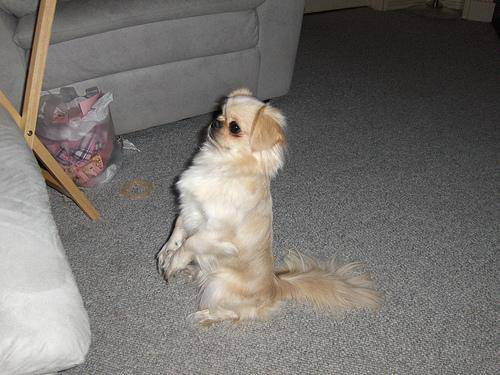

In [24]:
from IPython.display import display
from IPython.display import Image as _Imgdis
print("Train Image Example: \n")
display(_Imgdis(filename=train_folder + "/" + train_files_X.iloc[0,0], width=240, height=320))

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
from PIL import Image
import numpy as np
from time import time
from time import sleep
from random import shuffle
import cv2
import glob
def load_train(path, image_list, size):
    images=[]
    labels=[]
    ids=[]
    clas=[]
    files = glob.glob(path+'/*')
    for index, f1 in enumerate(image_list):
        im=cv2.imread(path + '/' + f1)
        image = cv2.resize(im, (size, size), cv2.INTER_LINEAR)
        images.append(image)
        labels.append(train_files_Y.iloc[index, :])
    images = np.array(images)
    images = images.astype(np.float32)
    images = np.multiply(images, 1.0 / 255.0)
    return images, pd.DataFrame(labels)

In [26]:
print("Image Size: ", IMG_SIZE)
X, Y = load_train(train_folder, train_files_X.iloc[:,0], IMG_SIZE)

Image Size:  96


In [28]:
print(X[0])
Y.head(3)

[[[0.3921569  0.41176474 0.4156863 ]
  [0.3803922  0.40000004 0.4039216 ]
  [0.41176474 0.43137258 0.43529415]
  ...
  [0.16078432 0.1764706  0.21568629]
  [0.16078432 0.16470589 0.20784315]
  [0.05490196 0.05490196 0.0509804 ]]

 [[0.3372549  0.3529412  0.35686275]
  [0.38823533 0.4039216  0.40784317]
  [0.38823533 0.4039216  0.40784317]
  ...
  [0.18431373 0.20392159 0.2392157 ]
  [0.18823531 0.19215688 0.23137257]
  [0.04705883 0.04313726 0.04705883]]

 [[0.25882354 0.26666668 0.27058825]
  [0.27058825 0.27450982 0.2784314 ]
  [0.3372549  0.34117648 0.34901962]
  ...
  [0.19215688 0.21176472 0.23137257]
  [0.19215688 0.20392159 0.22352943]
  [0.03921569 0.03529412 0.0509804 ]]

 ...

 [[0.7372549  0.74509805 0.7490196 ]
  [0.7490196  0.7568628  0.7607844 ]
  [0.78823537 0.7960785  0.8000001 ]
  ...
  [0.52156866 0.5294118  0.53333336]
  [0.42352945 0.43137258 0.43529415]
  [0.4666667  0.46274513 0.48627454]]

 [[0.7294118  0.74509805 0.7490196 ]
  [0.7411765  0.7568628  0.7607844 ]


,id,breed_afghan_hound,breed_african_hunting_dog,breed_airedale,breed_american_staffordshire_terrier,breed_appenzeller,breed_australian_terrier,breed_basenji,breed_basset,breed_beagle,breed_bedlington_terrier,breed_bernese_mountain_dog,breed_black-and-tan_coonhound,breed_blenheim_spaniel,breed_bloodhound,breed_bluetick,breed_border_collie,breed_border_terrier,breed_borzoi,breed_boston_bull,breed_bouvier_des_flandres,breed_boxer,breed_brabancon_griffon,breed_briard,breed_brittany_spaniel,breed_bull_mastiff,breed_cairn,breed_cardigan,breed_chesapeake_bay_retriever,breed_chihuahua,breed_chow,breed_clumber,breed_cocker_spaniel,breed_collie,breed_curly-coated_retriever,breed_dandie_dinmont,breed_dhole,breed_dingo,breed_doberman,breed_english_foxhound,...,breed_norwegian_elkhound,breed_norwich_terrier,breed_old_english_sheepdog,breed_otterhound,breed_papillon,breed_pekinese,breed_pembroke,breed_pomeranian,breed_pug,breed_redbone,breed_rhodesian_ridgeback,breed_rottweiler,breed_saint_bernard,breed_saluki,breed_samoyed,breed_schipperke,breed_scotch_terrier,breed_scottish_deerhound,breed_sealyham_terrier,breed_shetland_sheepdog,breed_shih-tzu,breed_siberian_husky,breed_silky_terrier,breed_soft-coated_wheaten_terrier,breed_staffordshire_bullterrier,breed_standard_poodle,breed_standard_schnauzer,breed_sussex_spaniel,breed_tibetan_mastiff,breed_tibetan_terrier,breed_toy_poodle,breed_toy_terrier,breed_vizsla,breed_walker_hound,breed_weimaraner,breed_welsh_springer_spaniel,breed_west_highland_white_terrier,breed_whippet,breed_wire-haired_fox_terrier,breed_yorkshire_terrier
2,001cdf01b096e06d78e9e5112d419397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00214f311d5d2247d5dfe4fe24b2303d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0021f9ceb3235effd7fcde7f7538ed62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
#Data is normalized and 4D
print(X.shape)

(10074, 96, 96, 3)


In [0]:
data_sample_submission = pd.read_csv("sample_submission.csv")

In [0]:
test_img = data_sample_submission.id

In [45]:
x_test_feature = []
i = 0 # initialisation
for f in test_img.values: # f for format ,jpg
    try:
       img = cv2.imread('./test/{}.jpg'.format(f))
       img_resize = cv2.resize(img, (IMG_SIZE, IMG_SIZE), cv2.INTER_LINEAR)
       x_test_feature.append(img_resize)
    except Exception as e:
        print(str(e))
x_test_feature = np.array(x_test_feature)
x_test_feature = x_test_feature.astype(np.float32)
x_test_feature = np.multiply(x_test_feature, 1.0 / 255.0)

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion faile

In [46]:
#Data is normalized and 4D
print(x_test_feature.shape)

(8393, 96, 96, 3)


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

Run the below code to load the test image files in x_test_feature

Normalize the test data and convert it into 4 dimensions

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
model_simple_conv = Sequential()

model_simple_conv.add(Conv2D(32, kernel_size = (5, 5), activation = "relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_simple_conv.add(keras.layers.BatchNormalization())
model_simple_conv.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_simple_conv.add(keras.layers.BatchNormalization())
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(256, activation='relu'))
model_simple_conv.add(Dropout(0.25))
model_simple_conv.add(Dense(120, activation='softmax'))

model_simple_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [50]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 92, 92, 32)        2432      
_________________________________________________________________
batch_normalization_3 (Batch (None, 92, 92, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 90, 90, 32)        128       
_________________________________________________________________
flatten_2 (Flatten)          (None, 259200)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               66355456  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.25, random_state = 7, shuffle = True)
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(7555, 96, 96, 3) (2519, 96, 96, 3) (7555, 120) (2519, 120)


### Use batch_size = 128 and epochs = 10 and execute the model

In [62]:
%%time 
from keras.callbacks import EarlyStopping
early_stopping = [EarlyStopping(patience=5)]
output_pooling_conv = model_simple_conv.fit(x_train, y_train, batch_size=128, epochs=10, verbose=2, callbacks=early_stopping,
                    validation_data=(x_test_feature,))

ValueError: ignored

In [38]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 92, 92, 32)        2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 92, 92, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 90, 90, 32)        128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 259200)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               66355456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [0]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(12, activation='sigmoid'))

In [0]:
cnn.summary()

In [0]:
cnn.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

### Make all the layers in the base_model (VGG16) to be non-trainable

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%